In [2]:
import pandas as pd    
import seaborn as sns
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from math import*
import time
from time import perf_counter

# Ввод интервала, шага и формулы

In [1]:
try:
    from_x, to_x, pace_x = map(float, input('Введи через пробел интервал и шаг: ').split())
except ValueError:
    print('введи адекватное число')
# границы числа, для точек разрыва
accuracy_limit = "%10.7g"
interval = [from_x, to_x]
interval

Введи через пробел интервал и шаг: -5 10 0.1


[-5.0, 10.0]

In [4]:
try:
    string = input('введи сюда формулу: ')
except ValueError:
    print('Введи корректное значение, пожалуйста')

введи сюда формулу: sin(x)/x


# Основная часть

 время выполнения программы: 0.0
[-5.0, 10.0]
0.1
 steps 50


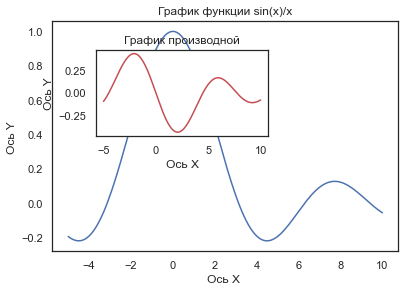

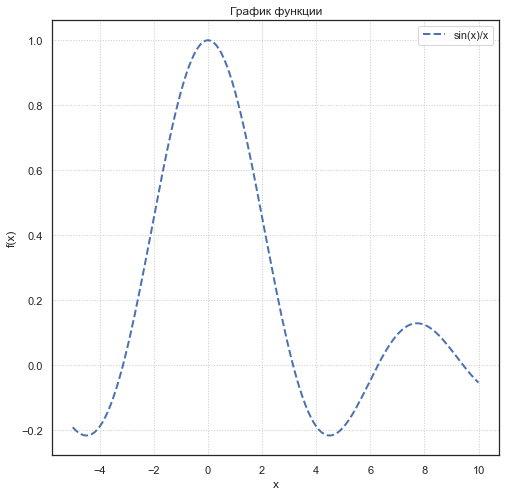

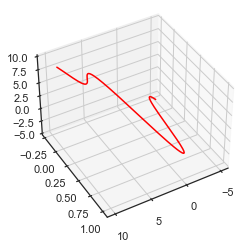

(        x     f'(x)
 0    -5.0 -0.094841
 1    -4.9 -0.078747
 2    -4.8 -0.061245
 3    -4.7 -0.042427
 4    -4.6 -0.022396
 ..    ...       ...
 146   9.6 -0.100530
 147   9.7 -0.096184
 148   9.8 -0.090996
 149   9.9 -0.085031
 150  10.0 -0.078362
 
 [151 rows x 2 columns],
         x      f(x)
 0    -5.0 -0.191785
 1    -4.9 -0.200501
 2    -4.8 -0.207534
 3    -4.7 -0.212750
 4    -4.6 -0.216020
 ..    ...       ...
 146   9.6 -0.018159
 147   9.7 -0.028017
 148   9.8 -0.037396
 149   9.9 -0.046216
 150  10.0 -0.054402
 
 [151 rows x 2 columns])

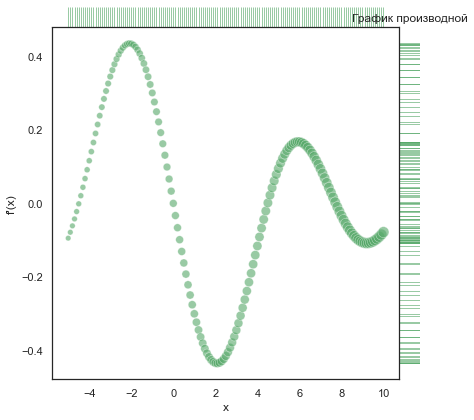

In [9]:
start = time.time()
def numerical_differentiation1(int_, st, string, to_json = False):
    try:
        #string = input('введи сюда формулу: ')
        # вычисляем двустороннюю разность
        def take_my_formula(formula, x): 
            return eval(formula) 
        
        def function(x): 
            return (x)
        
        def double_difference(start, st_h, fun):
            return (fun(start+st_h)-fun(start-st_h))/(2*st_h)
        
        def left_side_difference(start, st_h, fun):
            return (fun(start+st_h)-fun(start))/(st_h)
        
        def right_side_difference(start, st_h, fun):
            return (fun(start)-fun(start-st_h))/(st_h)
        #==================================================
        
        # Вычисляем размер оптимального интервала
        def optimal_step(int_1, st1):
            len_interval = int_1[1]-int_1[0]
            num_steps = len_interval/st1
            # проверить если шаг не попадает в границы
            if num_steps%1>0:
                int_1[1] = int(len_interval//st1)*st1 + st1
            return round(num_steps)
        
        #==================================================
        
        # MAIN PART
        # создаем таблицу pandas производной
        derivatives = []
        start_point = int_[0]
        x_means = []
        print(int_)
        print(st)
        steps_steps = int(optimal_step(int_, st))
        print(f' steps {int(optimal_step(int_, 0.3))}')
        # подставляем количество найденных шагов  
        for i in range (steps_steps+1):
            if isinf((take_my_formula(string, start_point+st) - take_my_formula(string, start_point))/(st)) or isinf((take_my_formula(string, start_point) - take_my_formula(string, start_point-st))/st):
                print('есть точки разрыва')
            else:
                try:
                    derivatives.append((take_my_formula(string, start_point+st) - take_my_formula(string, start_point-st))/(2*st))
                    #(double_difference(start_point, st, (take_my_formula(string, start_point))))
                    x_means.append(start_point)
                    start_point = start_point + st
                except ZeroDivisionError:
                    pass


        table_means_data = {"x":x_means, "f'(x)":derivatives}
        df= pd.DataFrame(table_means_data)  
        #print(derivatives)
        #print(x_means)
        #print(df) 
    
        # создаем таблицу pandas функции
        function_means = []
        start_point_f = int_[0]
        x_means_f = []
        # подставляем количество найденных шагов  
        for i in range (int(optimal_step(int_, st))+1):
            try:
                function_means.append(take_my_formula(string, start_point_f))
                x_means_f.append(start_point_f)
                start_point_f = start_point_f + st
            except ZeroDivisionError:
                pass
        
        table_function_means_data = {"x":x_means_f, "f(x)": function_means}
        df2= pd.DataFrame(table_function_means_data) 
        
        #print(function_means)
        #print(x_means_f)
        #print(df2) 
        #==================================================================
        #ГРАФИКИ
        # Создадим пустое полотно
        fig = plt.figure()

        # Оси задаются через список из 4-х чисел: координаты левого нижнего угла, ширина и высота.
        axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
        axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

        axes1.plot(df2['x'], df2['f(x)'], 'b')
        axes1.set_xlabel('Ось X ')
        axes1.set_ylabel('Ось Y ')
        axes1.set_title(f'График функции {string}')

        axes2.plot(df["x"], df["f'(x)"], 'r')
        axes2.set_xlabel('Ось X')
        axes2.set_ylabel('Ось Y')
        axes2.set_title('График производной')
        
        
    
        # график 1 - функции
        x = np.linspace(int_[0], int_[1], 125) 
        y = lambda x: x**2
        plt.figure(figsize=(8, 8))
        plt.plot(df2['x'], df2['f(x)'], linestyle='--', lw=2, label=f'{string}')
        plt.xlabel('x'), plt.ylabel('f(x)')
        plt.legend()
        plt.title('График функции')
        plt.grid(ls=':')
        plt.show()

  

        #график 2 - 3d функции
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        # координаты (function)
        #z = np.linspace(from_x, to_x, int(optimal_step(int_, st))+1)
        
        x = df2['x']
        y = df2['f(x)']
        z = x
        ax.plot3D(x, y, z, 'red')

        ax.view_init(40, 60)
        plt.show()
    
        sns.set_theme(style="white", color_codes=True)


        # График 3 - производной (seaborn)
        g = sns.JointGrid(data=df, x="x", y="f'(x)", space=0, ratio=17)
        g.plot_joint(sns.scatterplot, size=df["x"], sizes=(30, 120),
                     color="g", alpha=.6, legend=False)
        plt.title(r"График производной")
        g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

    
        return df, df2
    
        # записываем в json
        if not(df):
            print('Здесь пусто')
        if to_json:
            with open('{}.json'.format(to_json), 'w') as f:
                json.dump(dic, f)
                return True
        else:
            return dict_total
        
    except KeyError:
        print('None')
end = time.time()
print(f' время выполнения программы: {end - start}')

#strt = perf_counter()
#numerical_differentiation1(interval, pace_x, 'sin(x)/x')
#en = perf_counter()

#print(f' время выполнения программы: {en - strt}')

numerical_differentiation1(interval, pace_x, string)

# Вывод формулы графически

[-5.0, 10.0]
0.1
 steps 50


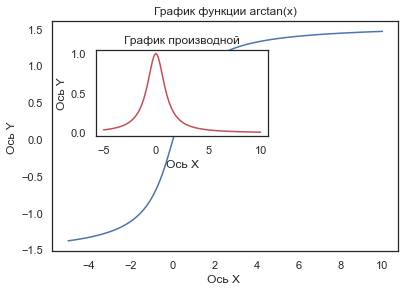

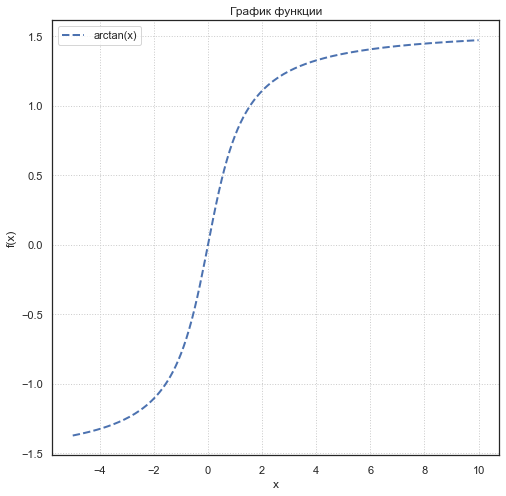

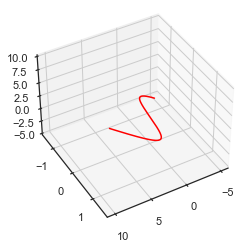

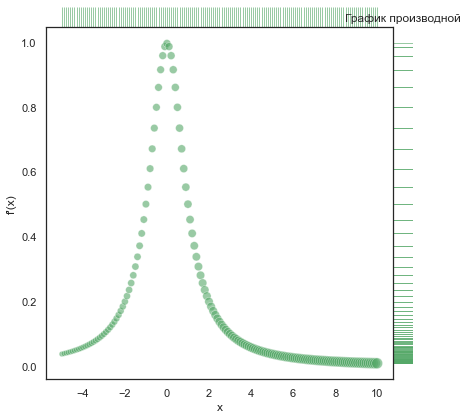

In [10]:
from tkinter import *
from tkinter import messagebox
from tkinter import ttk
import math
import sys
import numpy as np
from math import*
from numpy import*


window = Tk()
window.geometry("400x400")
window.title('Введи функцию')


bttn_list = [
"x**2", "x**3", "1/x", "√x","sin(x)", 
"cos(x)", "tan(x)", "arctan(x)" ,"arccos(x)", "arcsin(x)", 
"sin(x)/x", "1/ln(x)", "e^(-x^2)", "√(1-k^2*(sin(x)^2))", "log(x)",
"xⁿ", "a**x", "Форм", "2", "=", 
"*", "/", "±", "C", "Exit",
"x", "y", "π", "(", ")"]

r = 1
c = 0
for i in bttn_list:
    rel = ""
    cmd=lambda x=i: calc(x)
    ttk.Button(window, text=i, command = cmd, width = 10).grid(row=r, column = c)
    c += 1
    if c > 4:
        c = 0
        r += 1
        
# поле ввода        
calc_entry = Entry(window, width = 33)
calc_entry.grid(row=0, column=0, columnspan=5)

def calc(key):
    global memory
    if key == "=":
#исключение написания слов 
        if calc_entry.get()[0] not in bttn_list:
            calc_entry.insert(END, "bad bad boy, write correct!")
            messagebox.showerror("Error!", "You did not enter the number!")

    #исчисления
        try:
            res = calc_entry.get()
            print(res)
            calc_entry.insert(END, "=" + str(result))

        except:
            calc_entry.insert(END, "Error!")
            messagebox.showerror("Error!", "Check the correctness of data")

    
    elif key == "Форм":
        string = input('введи формулу: ')
        key = string
        numerical_differentiation1(interval, pace_x, key)
        window.after(1,window.destroy)
        sys.exit
        
    
    elif key == "(":
            calc_entry.insert(END, "(")

    elif key == ")":
            calc_entry.insert(END, ")")

    elif key == "C":
            calc_entry.delete(0, END)

    elif key == "Exit":
            window.after(1,window.destroy)
            sys.exit

    elif key == "π":
            calc_entry.insert(END, math.pi)

    elif key == "sin(x)":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit
            
    elif key == "cos(x)":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "xⁿ":
            n = input()
            key = f'x**{n}'
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "a**x":
            try:
                a = input('введи основание')
            except ValueError:
                print('введи адекватное число')
            key = f'{a}**x'
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "arcsin(x)":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "arccos(x)":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "tan(x)":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "arctan(x)":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "x**2":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "x**3":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "√x":
            key = "sqrt(x)"
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "1/x":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key ==  "sin(x)/x":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key ==  "1/ln(x)":
            key = "1/log(e)**x"
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "e^(-x^2)":
            key = "e**(-(x**2))"
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "√(1-k^2*(sin(x)^2))":
            try:
                k = input('введи основание: ')
            except ValueError:
                print('введи адекватное число')
            key = f'sqrt(1-(({k}**2)*(sin(x)**2)))'   
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit

    elif key == "log(x)":
            numerical_differentiation1(interval, pace_x, key)
            window.after(1,window.destroy)
            sys.exit
        
window.mainloop()